In [1]:
cd ../src

/home/meni/Documents/PyCharm/pydp/src


In [4]:
from __future__ import division
import matplotlib.pyplot as plt
import cluster as cluster
import time

In [6]:
cd ../tests

/home/meni/Documents/PyCharm/pydp/tests


In [8]:
from __non_private_cluster__ import *
%matplotlib inline

In [32]:
cluster_size, desired_amount_of_points = 1000, 600
dimension, domain = 2, (0, 30)
approximation, failure, eps, delta, promise = 0.1, 0.1, 0.5, 2**-10, 200

Three clusters far far away

In [33]:
means = [[10000, 100000], [4, 30], [100000, 500]]
covs = [np.eye(2)*5, np.eye(2)*20, np.eye(2)*100]
clusters = [np.random.multivariate_normal(m, v, cluster_size) for m, v in zip(means, covs)]
data = np.concatenate(([v for v in clusters]))

In [35]:
start_time = time.time()
test_radius, test_center = find_cluster(data, desired_amount_of_points)
print "Test-radius is %d" % test_radius
middle_time = time.time()
print "Run-time of non-private cluster finding: %.2f seconds" % (middle_time - start_time)

Test-radius is 2
Run-time of non-private cluster finding: 253.12 seconds


In [37]:
middle_time = time.time()
radius, center = cluster.find(data, dimension, domain, desired_amount_of_points,
                              approximation, failure, eps, delta)
end_time = time.time()
print "Good-radius is %d" % radius
print "Good-center is %s" % (str(center))
print "Run-time of private cluster finding: %.2f seconds" % (end_time - middle_time)
print "Amount of data points in the cluster %d" % (sum(1 for p in data if norm(p-center) <= radius))

Good-radius is 26
Good-center is [ -8.97284616  41.90642648]
Run-time of private cluster finding: 12.31 seconds
Amount of data points in the cluster 964


test cluster marked in green
private cluster marked in red


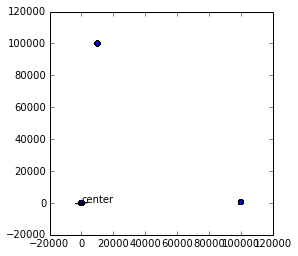

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.scatter(*zip(*data))
ax.annotate('center', xy=tuple(center), xytext=tuple(np.array(center)+100),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
phis = np.arange(0, 6.283, 0.01)
ax.plot(*circle(test_radius, phis, test_center), c='g', ls='-')
ax.plot(*circle(radius, phis, center), c='r', ls='-')
print "test cluster marked in green"
print "private cluster marked in red"

Three clusters less far away

In [39]:
means = [[500, 300], [4, 30], [300, 500]]
covs = [np.eye(2)*5, np.eye(2)*20, np.eye(2)*100]
clusters = [np.random.multivariate_normal(m, v, cluster_size) for m, v in zip(means, covs)]
data = np.concatenate(([v for v in clusters]))

In [40]:
start_time = time.time()
test_radius, test_center = find_cluster(data, desired_amount_of_points)
print "Test-radius is %d" % test_radius
middle_time = time.time()
print "Run-time of non-private cluster finding: %.2f seconds" % (middle_time - start_time)

Test-radius is 3
Run-time of non-private cluster finding: 399.07 seconds


In [43]:
middle_time = time.time()
radius, center = cluster.find(data, dimension, domain, desired_amount_of_points,
                              approximation, failure, eps, delta)
end_time = time.time()
print "Good-radius is %d" % radius
print "Good-center is %s" % (str(center))
print "Run-time of private cluster finding: %.2f seconds" % (end_time - middle_time)
print "Amount of data points in the cluster %d" % (sum(1 for p in data if norm(p-center) <= radius))

Good-radius is 19
Good-center is [ 194.25637603  214.92063811]
Run-time of private cluster finding: 21.69 seconds
Amount of data points in the cluster 0


test cluster marked in green
private cluster marked in red


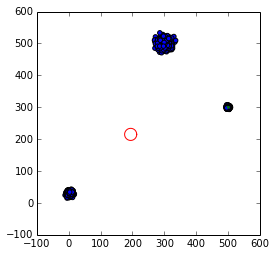

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.scatter(*zip(*data))
# ax.annotate('center', xy=tuple(center), xytext=tuple(np.array(center)+100),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )
phis = np.arange(0, 6.283, 0.01)
ax.plot(*circle(test_radius, phis, test_center), c='g', ls='-')
ax.plot(*circle(radius, phis, center), c='r', ls='-')
print "test cluster marked in green"
print "private cluster marked in red"